In [47]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AR, ARResults
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Data/uspopulation.csv',index_col=0,parse_dates=True)
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [4]:
df.shape

(96, 1)

In [5]:
df.index.freq = 'MS'

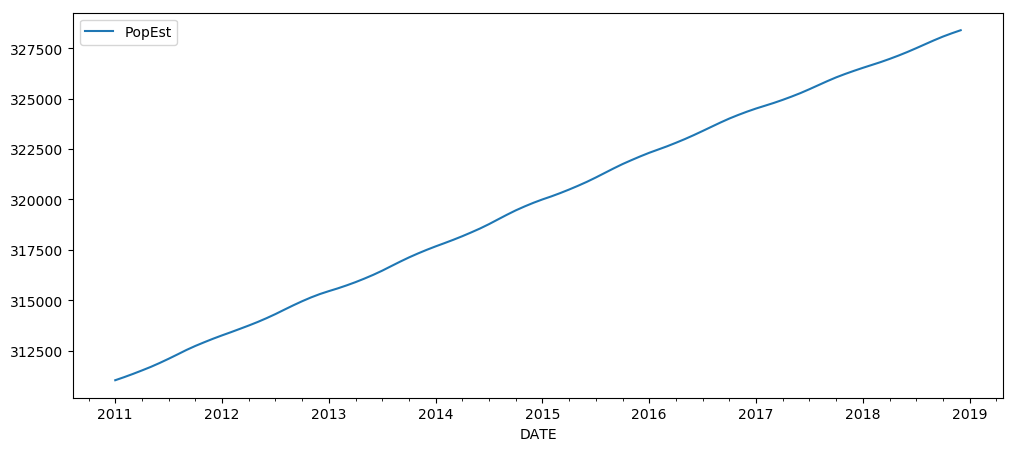

In [6]:
df.plot(figsize=(12,5));

In [7]:
train_data = df[:84]
test_data = df[84:]

In [8]:
train_data.shape, test_data.shape

((84, 1), (12, 1))

In [11]:
model = AR(train_data['PopEst'])
model

In [12]:
AR1_fitted_model = model.fit(maxlag=1)
AR1_fitted_model

In [13]:
AR1_fitted_model.aic

6.410771237032258

In [14]:
AR1_fitted_model.bic

6.498199210808039

In [15]:
AR1_fitted_model.bse

const        187.703166
L1.PopEst      0.000589
dtype: float64

In [16]:
AR1_fitted_model.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [17]:
AR1_fitted_model.hqic

6.445894901303561

In [18]:
AR1_fitted_model.k_ar

1

In [21]:
AR1_fitted_model.k_trend

1

In [22]:
AR1_fitted_model.k_constant

0

In [26]:
AR1_fitted_model.df_model

2

In [27]:
AR1_fitted_model.df_resid

82

In [29]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [30]:
AR1_fitted_model.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [32]:
test_data

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [33]:
test_predictions1 = AR1_fitted_model.predict(start=start,end=end)
test_predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

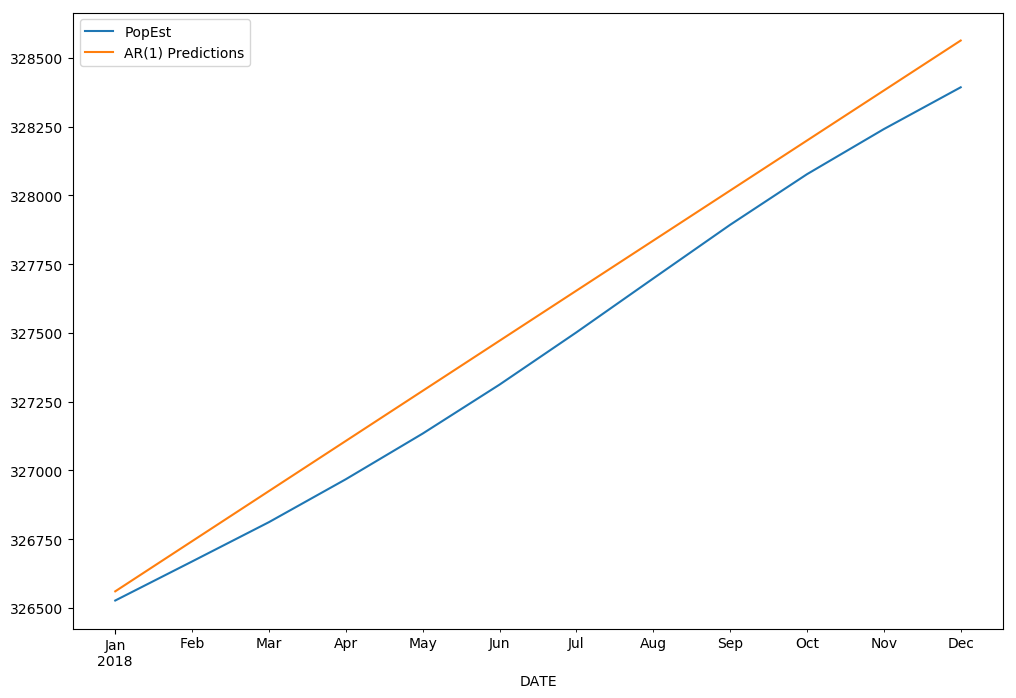

In [36]:
test_data.plot(figsize=(12,8),legend=True,label='actual')
test_predictions1.plot(legend=True,label='AR(1) Predictions');

In [37]:
AR2_fitted_model = model.fit(maxlag=2)
AR2_fitted_model

In [38]:
AR2_fitted_model.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [39]:
test_predictions2 = AR2_fitted_model.predict(start=start,end=end)
test_predictions2 = test_predictions2.rename('AR(2) Predictions')
test_predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826847
2018-09-01    327829.064480
2018-10-01    327992.414809
2018-11-01    328155.804859
2018-12-01    328319.172308
Freq: MS, Name: AR(2) Predictions, dtype: float64

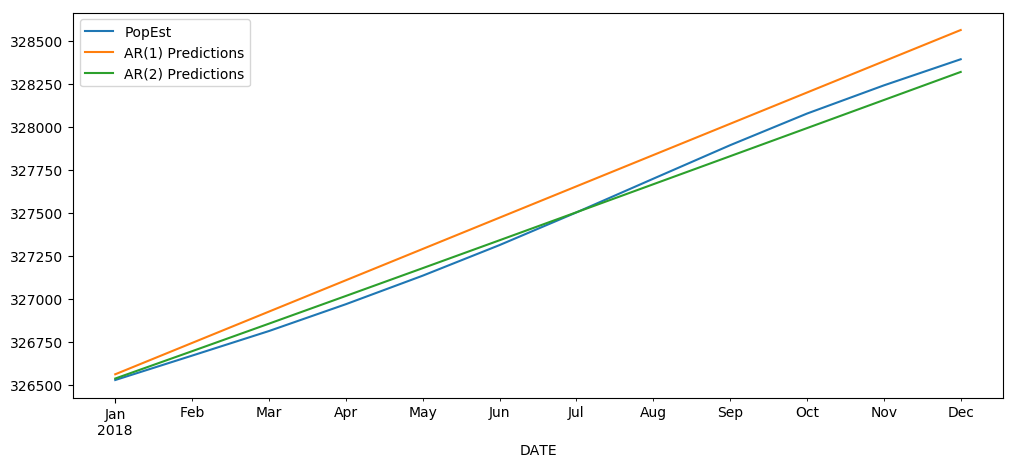

In [40]:
test_data.plot(figsize=(12,5),legend=True,label='original data')
test_predictions1.plot(legend=True,label='AR(1) Predictions')
test_predictions2.plot(legend=True,label='AR(2) Predictions');

In [41]:
ARfit = model.fit(ic='t-stat')
ARfit

In [42]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [44]:
AR8_predictions = ARfit.predict(start=start,end=end)
AR8_predictions

2018-01-01    326523.865559
2018-02-01    326662.772568
2018-03-01    326805.746870
2018-04-01    326960.064201
2018-05-01    327130.572901
2018-06-01    327315.962732
2018-07-01    327511.010032
2018-08-01    327710.938277
2018-09-01    327907.425445
2018-10-01    328092.870664
2018-11-01    328264.133551
2018-12-01    328421.667095
Freq: MS, dtype: float64

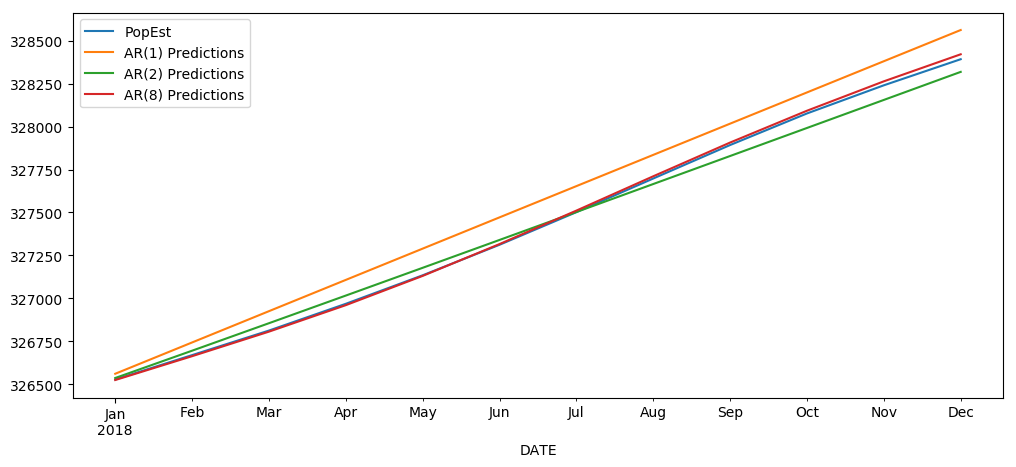

In [45]:
test_data.plot(figsize=(12,5),legend=True,label='original data')
test_predictions1.plot(legend=True,label='AR(1) Predictions')
test_predictions2.plot(legend=True,label='AR(2) Predictions')
AR8_predictions.plot(legend=True,label='AR(8) Predictions');

In [48]:
print("RMSE(AR(1)):",np.sqrt(mean_squared_error(test_data,test_predictions1)))
print("RMSE(AR(2)):",np.sqrt(mean_squared_error(test_data,test_predictions2)))
print("RMSE(AR(8)):",np.sqrt(mean_squared_error(test_data,AR8_predictions)))

RMSE(AR(1)): 132.09736651264984
RMSE(AR(2)): 52.0889490743968
RMSE(AR(8)): 13.673718813461983


AR of order 8 is the best performing model having achieved the least RMSE score as compared to AR(1) and AR(2) models.

## Forecasting into the future

In [49]:
model = AR(df['PopEst'])
model

In [50]:
AR_fitted_model = model.fit()
AR_fitted_model

In [51]:
AR_fitted_model.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

In [52]:
forecasted_values = AR_fitted_model.predict(start=len(df),end=len(df)+12) # Test set length should match the forecast length
forecasted_values

2019-01-01    328537.420467
2019-02-01    328673.215503
2019-03-01    328810.443245
2019-04-01    328957.592972
2019-05-01    329117.335959
2019-06-01    329289.277295
2019-07-01    329470.144338
2019-08-01    329655.073711
2019-09-01    329839.483130
2019-10-01    330015.435122
2019-11-01    330175.676175
2019-12-01    330322.580392
2020-01-01    330459.617590
Freq: MS, dtype: float64

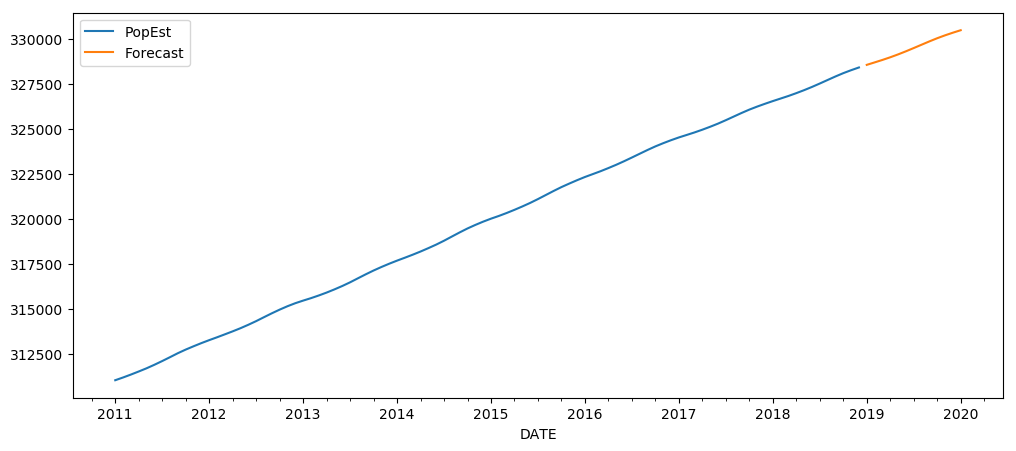

In [54]:
df.plot(figsize=(12,5))
forecasted_values.plot(legend=True,label='Forecast');

In [55]:
forecasted_values = AR_fitted_model.predict(start=len(df),end=len(df)+24)
forecasted_values

2019-01-01    328537.420467
2019-02-01    328673.215503
2019-03-01    328810.443245
2019-04-01    328957.592972
2019-05-01    329117.335959
2019-06-01    329289.277295
2019-07-01    329470.144338
2019-08-01    329655.073711
2019-09-01    329839.483130
2019-10-01    330015.435122
2019-11-01    330175.676175
2019-12-01    330322.580392
2020-01-01    330459.617590
2020-02-01    330589.980745
2020-03-01    330720.644910
2020-04-01    330858.631266
2020-05-01    331008.625418
2020-06-01    331171.295809
2020-07-01    331343.206893
2020-08-01    331519.079298
2020-09-01    331693.967164
2020-10-01    331861.248845
2020-11-01    332015.234830
2020-12-01    332155.793660
2021-01-01    332285.711645
Freq: MS, dtype: float64

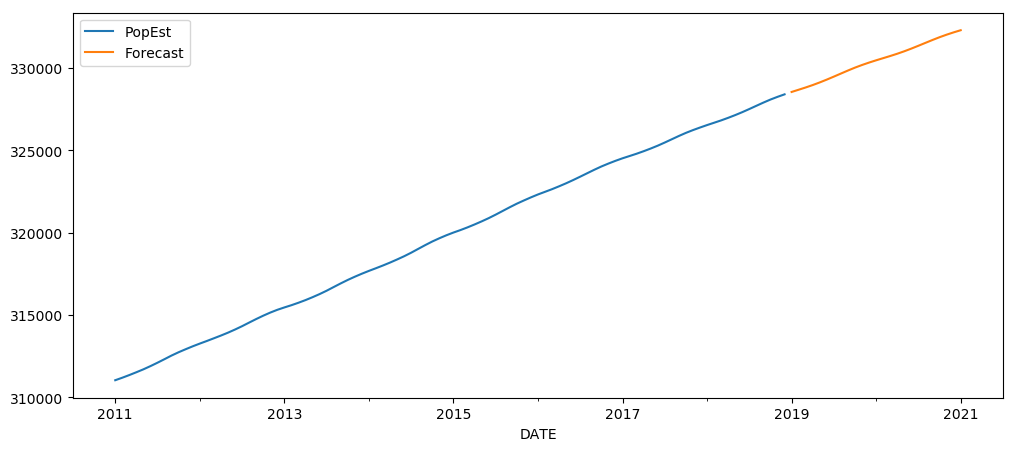

In [56]:
df.plot(figsize=(12,5))
forecasted_values.plot(legend=True,label='Forecast');